<a href="https://colab.research.google.com/github/Maksimka9/-2021/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Зависимости

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
#test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

filename = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_2.csv?raw=true"
df = pd.read_csv(filename, index_col=False)
df

,subj_1,subj_-производственная: практика по получению профессиональных умений и опыта профессиональной деятельности,subj_аддитивные технологии получения материалов для ркт,subj_административное право,subj_административный менеджмент,subj_академическая живопись,subj_академическая скульптура и пластическое моделирование,subj_академический рисунок,subj_академический рисунок и скульптура,subj_анализ временных рядов и прогнозирование,subj_анализ статистической информации с помощью пакетов прикладных программ,subj_анатомия и физиология человека,subj_антикризисное управление кредитными организациями,subj_антикризисное управление финансовыми организациями,subj_архитектоника,subj_архитектура вычислительных систем,subj_архитектура пк,subj_астрономия,subj_безопасность жизнедеятельности,subj_биология,subj_бухгалтерский учет,subj_бухгалтерский учет и анализ,subj_бухгалтерский учет и аудит,subj_введение в программную инженерию,subj_введение в профессию,subj_введение в специальность,subj_введение в специальную технику,subj_внутрифирменный управленческий анализ и контролинг,subj_всеобщая история,subj_выполнение работ по должности кассир,subj_выполнение работ по должности служащего делопроизводитель,"subj_выполнение работ по одной или нескольким профессиям рабочих, должностям служащих","subj_выполнение работ по профессии ""слесарь по ремонту автомобилей""",subj_выполнение работ по профессии «кассир»,subj_выполнение художественно-конструкторских проектов в материале,subj_высокотемпературные композиционные материалы для ркт,subj_высшая математика,subj_география,subj_государственная система защиты информации в части проведения специальных работ,subj_гражданский процесс,...,subj_учет и анализ,subj_физика,subj_физика и естествознание,subj_физическая культура,subj_физкультура,subj_философия,subj_финансовая математика,subj_финансовые и денежно-кредитные методы регулирования экономики,subj_финансовый менеджмент,subj_финансы,"subj_финансы, денежное обращение и кредит",subj_формирование клиентской базы,subj_химия,subj_человеко-компьютерное взаимодействие,subj_экологические основы природопользования,subj_экология,subj_экономика,subj_экономика и организация машиностроительного производства,subj_экономика и организация производства,subj_экономика и организация труда,subj_экономика и социология труда,subj_экономика и управление,subj_экономика и управление домашним хозяйством,subj_экономика ниокр,subj_экономика организации,subj_экономика предприятия,subj_экономика предприятия и организация производства,subj_экономико-математические методы моделирования,subj_экономическая теория,subj_экономический потенциал таможенных территорий и регионалистика мира,subj_экспертные системы комплексной оценки безопасности автоматизированных и телекоммуникационных систем,subj_элективные курсы по физической культуре,subj_элективные курсы по физической культуре и спорту,subj_электротехника,subj_электротехника и электроника,subj_электротехника и электронная техника,subj_этика деловых отношений,subj_эффективное поведение на рынке труда,subj_языки высокого уровня,subj_языки программирования
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,4,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_df = StandardScaler().fit_transform(df)
standart_df

array([[ 9.84733466e+01, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02, -1.20981807e-01, -4.61644231e-02],
       [-1.01550321e-02, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02,  7.87412255e+00, -4.61644231e-02],
       [-1.01550321e-02, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02, -1.20981807e-01, -4.61644231e-02],
       ...,
       [-1.01550321e-02, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02, -1.20981807e-01, -4.61644231e-02],
       [-1.01550321e-02, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02, -1.20981807e-01, -4.61644231e-02],
       [-1.01550321e-02, -2.94377468e-02, -5.08381116e-02, ...,
        -4.73987949e-02, -1.20981807e-01, -4.61644231e-02]])

In [4]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(standart_df) # Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df = pd.DataFrame(reduced_df) # Превращаем результаты обратно в удобный вид
reduced_df

,0,1
0,0.872725,0.283031
1,1.719548,0.607531
2,-4.172321,-1.115481
3,-2.331095,-0.642572
4,0.989315,0.420110
...,...,...
9693,1.461902,0.993055
9694,1.720525,0.793103
9695,10.559967,-6.375211
9696,-0.323633,-0.053042


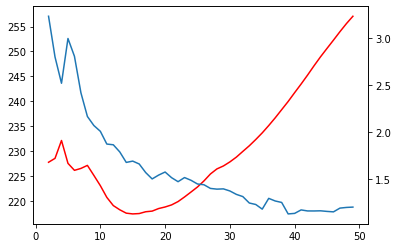

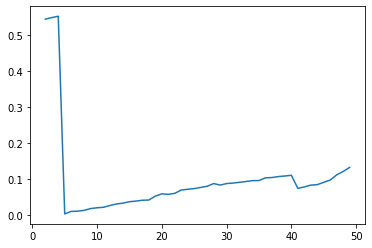

Калински-Харабаз: 4 0.551050798326693
Калински-Харабаз: 49 257.0616299504712
Дэвис-Боулдин: 39 1.1300273182355198


In [5]:
# Посчитаем коэффициент силуэта и инерцию - метрики кластеризации, чтобы понять насколько хорошо была проведена кластеризация.

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


#inertia_dict = {} # Создаём словарь для значений инерции и коэффициента силуэта по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}
# iteration_list = []


for k in range(2, 50):
  agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k) # Создаём экземпляр класса, где указываем количество кластеров и количество прогонов для одного значения (n_init)
  y = agglom_clustering.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
  #transfer_list_inertia = {k: k_means.inertia_} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: инерция}
  transfer_list_silhouette = {k: silhouette_score(standart_df, y)} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: к-т силуэта}
  transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(standart_df, y)}
  transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(standart_df, y)}
  # inertia_dict.update(transfer_list_inertia) # Переносим данные в главные словари
  silhouette_dict.update(transfer_list_silhouette)
  calinski_score_dict.update(transfer_list_calinski)
  davies_score_dict.update(transfer_list_davies)
  # iteration_list.append(k_means.n_iter_)
  # del(transfer_list_inertia) # Удаляем вспомогательные словари
  del(transfer_list_silhouette)
  del(transfer_list_calinski)
  del(transfer_list_davies)


#inertia_df = pd.DataFrame.from_dict(inertia_dict, orient='index') # Создаём pandas dataframe из словарей
silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


figure = matplotlib.figure.Figure() # Создаём экземпляр класса Figure
axis_1 = figure.add_subplot() # Создаём вспомогательную ось графика
axis_1.plot(calinski_df, c='r') # Указываем интервал для оси
axis_2 = axis_1.twinx() # Добавляем вторую ось
axis_2.plot(davies_df) # Указываем интервал
display(figure) # Выводим на экран

figure_silhouette = matplotlib.figure.Figure()
axis_3 = figure_silhouette.add_subplot()
axis_3.plot(silhouette_df)
display(figure_silhouette)

# Выведем значение силуэта (оно максимизируется при использовании алгоритма k-средних)

print('Калински-Харабаз:', max(silhouette_dict, key=silhouette_dict.get), max(silhouette_dict.values()))

print('Калински-Харабаз:', max(calinski_score_dict, key=calinski_score_dict.get), max(calinski_score_dict.values()))

# Выведем значение инерции (оно минимизируется при использовании алгоритма k-средних)

print('Дэвис-Боулдин:', min(davies_score_dict, key=davies_score_dict.get), min(davies_score_dict.values()))

# silhouette_score(x,cluster.labels_)

In [8]:
# делаем кластеризацию вручную на определенном кол-ве кластеров

kmeans = sklearn.cluster.KMeans(n_clusters = 10)
processed_df = kmeans.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
processed_df

array([5, 0, 9, ..., 5, 5, 9], dtype=int32)

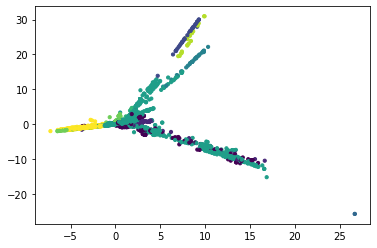

In [9]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(reduced_df[0], reduced_df[1], c = processed_df, s=10) # с - используемые цвета
matplotlib.pyplot.show()